In [57]:
import pandas as pd
import nltk
from gensim import corpora
import re
import spacy
import pyLDAvis
import pyLDAvis.gensim #dont skip this
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [58]:
# Download NLTK resources if you haven't already
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Jade
[nltk_data]     Rosales\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
def filter_spoiler_reviews(df):
    return df.drop(df[df['review'] == '[SPOILER ALERT: This review contains spoilers.]'].index)

# Function to categorize the ratings
def categorize_rating(rating):
    if rating <= 5:
        return  'Negative Review'
    else:
        return 'Positive Review'
    
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


<>:15: DeprecationWarning: invalid escape sequence '\['
<>:16: DeprecationWarning: invalid escape sequence '\S'
<>:19: DeprecationWarning: invalid escape sequence '\w'
<>:15: DeprecationWarning: invalid escape sequence '\['
<>:16: DeprecationWarning: invalid escape sequence '\S'
<>:19: DeprecationWarning: invalid escape sequence '\w'
C:\Users\Jade Rosales\AppData\Local\Temp\ipykernel_15456\3971950116.py:15: DeprecationWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Jade Rosales\AppData\Local\Temp\ipykernel_15456\3971950116.py:16: DeprecationWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Jade Rosales\AppData\Local\Temp\ipykernel_15456\3971950116.py:19: DeprecationWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [60]:
game_df = {}

def process_df(df, filenames):
    df = pd.concat([pd.read_csv(filename) for filename in filenames])
    df = filter_spoiler_reviews(df)
    df['rating'] = df['rating'].apply(categorize_rating)
    df['review'] = df['review'].apply(clean_text)
    return df

filenames_dict = {
    'engage': ['dataset/engage.csv'],
    'threehouses': ['dataset/threehouses.csv'],
    'echoes': ['dataset/echoes.csv'],
    'conquest': ['dataset/conquest.csv'],
    'birthright': ['dataset/birthright.csv'],
    'revelations': ['dataset/revelations.csv'],
    'awakening': ['dataset/awakening.csv'],
}

for df_name, filenames in filenames_dict.items():
    game_df[df_name] = process_df(pd.DataFrame(), filenames)


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/brithright.csv'

In [ ]:
negative_reviews_dict = {}
positive_reviews_dict = {}

for df_name, df in game_df.items():
    negative_reviews_dict[df_name] = df[df['rating'] == 'Negative Review']
    positive_reviews_dict[df_name] = df[df['rating'] == 'Positive Review']

In [ ]:
total=0
print('Overall')
for attr, df in game_df.items():  # Assuming game_df is a dictionary
    total += len(df)

print(total)

for attr, df in game_df.items():
    print(attr)
    print('Total Reviews: ',len(df))
    print('Negative Reviews: ',len(negative_reviews_dict[attr]))
    print('Positive Reviews: ',len(positive_reviews_dict[attr]))

Overall
2045
engage
Total Reviews:  468
Negative Reviews:  170
Positive Reviews:  298
threehouses
Total Reviews:  987
Negative Reviews:  82
Positive Reviews:  905
echoes
Total Reviews:  95
Negative Reviews:  8
Positive Reviews:  87
conquest
Total Reviews:  47
Negative Reviews:  9
Positive Reviews:  38
birthright
Total Reviews:  34
Negative Reviews:  8
Positive Reviews:  26
revelations
Total Reviews:  76
Negative Reviews:  12
Positive Reviews:  64
awakening
Total Reviews:  338
Negative Reviews:  21
Positive Reviews:  317


In [ ]:
from nltk.corpus import opinion_lexicon

# # Initialize positive and negative word sets
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [ ]:
# from gensim.models.keyedvectors import KeyedVectors

# path='GoogleNews-vectors-negative300.bin.gz'
# model = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
from gensim.utils import simple_preprocess

# words_to_check = ['gameplay', 'objectives', 'story', 'aesthetics', 'strategy', 'constraints', 'fun',  'boring', 'interactive', 'music', 'audio', 'challenge', 'reward', 'graphics', 'animation', 'level', 'design', 'character', 'challenge', 'theme', 'creative', 'feature', 'style', 'emotional', 'memorable', 'personality', 'map', 'world', 'development']

# similar_words = []
# for word in words_to_check:
#     similar_words.append(model.most_similar(word, topn=10))

# similar_words_list = [item[0] for sublist in similar_words for item in sublist]

# similar_words_list.extend(words_to_check)

nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

In [ ]:
#nlp stopwords
import string

from nltk.corpus import stopwords
stop_words= stopwords.words('english') + list(string.punctuation)
stop_words += list(['fire', 'emblem', 'game','awakening', 'conquest', 'fate', 'birthright', 'revelations', 'echo', 'shadow', 'valentia' ,'three', 'house', 'engage', 'play', 'buy', 'rpg'])
stop_words

# spacy.lang.en.stop_words.STOP_WORDS |= {'fire', 'emblem'}

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from nltk.stem.snowball import SnowballStemmer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import LsiModel

snow_stemmer = SnowballStemmer(language='english')


def lemmatization(texts,allowed_postags=['NOUN','ADJ','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    data_words=simple_preprocess(str(texts))
    doc=nlp(' '.join(data_words))
    tokens = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in positive_words]
    tokens = [word for word in tokens if word not in negative_words]
    # tokens = [snow_stemmer.stem(token) for token in tokens]

    # gram_tokens = nltk.bigrams(tokens)
    # stemmed_grams = ['_'.join(gram) for gram in gram_tokens]
    # tokens = stemmed_tokens+stemmed_grams
    return tokens

def create_corpus(df):
    # Tokenize the 'Review' column
    tokenized_reviews = df['review'].apply(lemmatization, allowed_postags=['NOUN'])

    # Add n-grams
    phrases = Phrases(tokenized_reviews, min_count=5, threshold=100)
    bigram = Phraser(phrases)
    tokenized_reviews = list(bigram[tokenized_reviews])

    dictionary = Dictionary(tokenized_reviews)

    corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

    return (corpus, dictionary, tokenized_reviews)

def calc_coherence_values(dictionary, corpus, texts, num_topics=10):
    # Train a LDA model
    model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, alpha=.1, eta=0.1, random_state = 42)
    print('model created')
    
    # Calculate for the coherence score
    coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
    coherence_value = coherencemodel.get_coherence()
    return model, coherence_value


def tfidf(corpus, dictionary):
    # Train a TF-IDF model
    tfidf = TfidfModel(corpus=corpus)

    # Get TF-IDF weights for each word
    tfidf_corpus = tfidf[corpus]

    # Sort the words by their TF-IDF weights
    words = sorted([(dictionary[word_id], weight) for doc in tfidf_corpus for word_id, weight in doc], key=lambda x: -x[1])


    return tfidf_corpus, words
      

def display_frequent_words(words):
    seen_words = set()
    for word, weight in words:
        if word not in seen_words:
            print(f"{word}: {weight}")
            seen_words.add(word)

In [ ]:
for attr, value in negative_reviews_dict.items():
    print('Results for ' + attr)
    corpus, dict, token = create_corpus(value)
    tfidf_corpus, words = tfidf(corpus, dict)
    lda_model, coherence_value = calc_coherence_values(dictionary = dict, corpus = tfidf_corpus, texts = token, num_topics=25)
    print(coherence_value)
    pyLDAvis.enable_notebook()
    vis=pyLDAvis.gensim.prepare(lda_model,corpus,dict,mds='mmds')
    pyLDAvis.save_html(vis, 'results/'+attr+'_negative.html')
    

Results for engage
model created
0.4277507455288692


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for threehouses
model created
0.4132566742879853


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for echoes
model created
0.5169432167427925


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for conquest
model created
0.5043257817470017


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for birthright
model created
0.5095480734498897


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for revelations
model created
0.6469902378320398


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for awakening
model created
0.614321625336969


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
for attr, value in positive_reviews_dict.items():
    print('Results for ' + attr)
    corpus, dict, token = create_corpus(value)
    tfidf_corpus, words = tfidf(corpus, dict)
    lda_model, coherence_value = calc_coherence_values(dictionary = dict, corpus = tfidf_corpus, texts = token, num_topics=25)
    print(coherence_value)
    pyLDAvis.enable_notebook()
    vis=pyLDAvis.gensim.prepare(lda_model,corpus,dict,mds='mmds')
    pyLDAvis.save_html(vis, 'results/'+attr+'_positive.html')

Results for engage
model created
0.48252956692783755


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for threehouses
model created
0.522967621709117


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for echoes
model created
0.35758849320071934


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for conquest
model created
0.5082830043225744


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for birthright
model created
0.5996000622586323


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for revelations
model created
0.47046537912379544


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Results for awakening
model created
0.4568346056380198


c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
all_df = pd.concat(game_df.values(), ignore_index=True)
negative_reviews_all = all_df[all_df['rating'] == 'Negative Review']
positive_reviews_all = all_df[all_df['rating'] == 'Positive Review']

print(len(all_df))
print(len(negative_reviews_all))
print(len(positive_reviews_all))

2045
310
1735


In [ ]:
print('Results for negative overall')
corpus, dict, token = create_corpus(negative_reviews_all)
token

Results for negative overall


[['stuff',
  'battle',
  'rewind',
  'point',
  'chance',
  'point',
  'experience',
  'par'],
 ['chapter',
  'battle',
  'combat',
  'animation',
  'step',
  'turn',
  'mechanic',
  'kind',
  'implimentation',
  'depth',
  'unit',
  'customization',
  'story',
  'gameplay',
  'character',
  'trope',
  'character',
  'sandwich',
  'mark',
  'point',
  'lot',
  'mechanic',
  'somniel',
  'comparison',
  'ass',
  'npc',
  'squat',
  'arena',
  'fight',
  'addition',
  'unit',
  'exp',
  'heart',
  'monstary',
  'hub',
  'world',
  'year',
  'character',
  'part',
  'guy'],
 ['fanbase', 'product', 'waifu', 'jpeg', 'project'],
 ['story',
  'lore',
  'chapter',
  'character',
  'design',
  'aspect',
  'character',
  'combat',
  'system',
  'cast',
  'lot'],
 ['zu', 'alle'],
 ['hope', 'story', 'lore', 'character', 'prev', 'franchise'],
 ['direction',
  'story',
  'era',
  'story',
  'romance',
  'character',
  'design',
  'step',
  'character',
  'child',
  'battle',
  'gameplay',
  'ring',


In [ ]:
tfidf_corpus, words = tfidf(corpus, dict)
lda_model, coherence_value = calc_coherence_values(dictionary = dict, corpus = tfidf_corpus, texts = token, num_topics=25)
print(coherence_value)


model created
0.4797644074350471


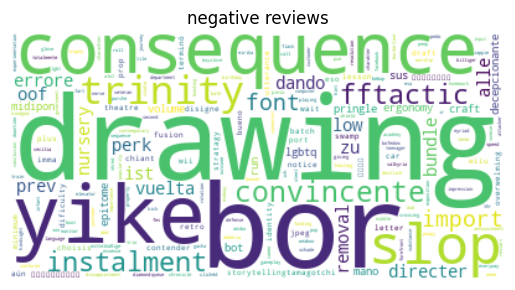

In [ ]:
text = {word: value for word, value in words}
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("negative reviews")
plt.show()

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

Topic: 0 
Words: 0.006*"fes" + 0.005*"writing" + 0.005*"consequence" + 0.005*"switch" + 0.005*"combat" + 0.004*"gameplay" + 0.004*"series" + 0.004*"removal" + 0.004*"window" + 0.004*"writer"
Topic: 1 
Words: 0.008*"character" + 0.005*"artstyle" + 0.004*"nursery" + 0.004*"saga" + 0.004*"essence" + 0.004*"ergonomy" + 0.004*"stick" + 0.004*"gameplay" + 0.004*"console" + 0.004*"grindy"
Topic: 2 
Words: 0.007*"child" + 0.005*"impression" + 0.005*"playing" + 0.004*"storytelling" + 0.004*"device" + 0.004*"system" + 0.004*"piece" + 0.004*"resource" + 0.003*"sp" + 0.003*"weapon"
Topic: 3 
Words: 0.009*"review" + 0.007*"voice_acting" + 0.006*"pokemon" + 0.006*"soul" + 0.006*"company" + 0.004*"story" + 0.004*"gameplay" + 0.004*"one" + 0.004*"alle" + 0.004*"zu"
Topic: 4 
Words: 0.008*"time" + 0.006*"dlc" + 0.005*"combat" + 0.004*"past" + 0.004*"map" + 0.004*"hour" + 0.004*"sus" + 0.004*"lgbtq" + 0.004*"lesson" + 0.004*"draft"
Topic: 5 
Words: 0.007*"thing" + 0.007*"design" + 0.006*"bor" + 0.005*"b

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,dict,mds='mmds')
pyLDAvis.save_html(vis, 'results/all_negative.html')
vis

c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.024658  0.037784       1        1  15.388759
6      0.017467 -0.037126       2        1   7.587356
15    -0.051736  0.004967       3        1   7.398641
23    -0.012381  0.041960       4        1   5.626414
19     0.030756 -0.026249       5        1   4.977757
10     0.038655 -0.016401       6        1   4.879648
0      0.011117  0.046892       7        1   4.811547
17    -0.022039 -0.037574       8        1   4.534386
8     -0.025928  0.007596       9        1   4.368398
16     0.029082  0.020517      10        1   4.225932
4      0.042284  0.012057      11        1   3.941042
21    -0.000967  0.024277      12        1   3.924750
24    -0.043822 -0.014940      13        1   3.598238
3     -0.031650  0.035159      14        1   3.340554
5     -0.001141 -0.045302      15        1   2.984616
13    -0.018937  0.016596      16        1   2.644645
9     -0.003217 -0.005610      17        1   2.590661
1     -0.023758 -0.015658      18        1   2.471561
18     0.005257 -0.000258      19        1   2.455192
20     0.032770 -0.002965      20        1   2.189184
12    -0.011106 -0.018078      21        1   1.579672
14     0.006250 -0.015887      22        1   1.555102
11     0.016209  0.003154      23        1   1.529633
2     -0.001495 -0.013132      24        1   0.876083
22    -0.006329 -0.001778      25        1   0.520229, topic_info=         Term       Freq      Total Category  logprob  loglift
50     system  19.000000  19.000000  Default  30.0000  30.0000
27   mechanic  16.000000  16.000000  Default  29.0000  29.0000
30       part   9.000000   9.000000  Default  28.0000  28.0000
56      child   9.000000   9.000000  Default  27.0000  27.0000
107    switch   7.000000   7.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
157      time   0.023855  17.756895  Topic25  -7.3253  -1.3539
50     system   0.023852  19.191931  Topic25  -7.3254  -1.4317
34       step   0.023851  13.264760  Topic25  -7.3255  -1.0624
0      battle   0.023849  15.359837  Topic25  -7.3256  -1.2091
69     series   0.023848  17.594771  Topic25  -7.3256  -1.3450

[1141 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1233      1  0.240690         abd
1233     13  0.240690         abd
202       1  0.427597     ability
202       3  0.142532     ability
202       8  0.142532     ability
...     ...       ...         ...
260       3  0.410377  นมาจากภาคก
261       1  0.205208    ยดายงบจร
261       3  0.410417    ยดายงบจร
262       1  0.205183        และน
262       3  0.410367        และน

[1945 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 16, 24, 20, 11, 1, 18, 9, 17, 5, 22, 25, 4, 6, 14, 10, 2, 19, 21, 13, 15, 12, 3, 23])

In [ ]:
print('Results for positive overall')
corpus, dict, token = create_corpus(positive_reviews_all)
token

Results for positive overall


[['character'],
 ['story',
  'depth',
  'development',
  'time',
  'gameplay',
  'battle',
  'character',
  'combo',
  'battle',
  'bit',
  'lot'],
 ['people',
  'story',
  'course',
  'story',
  'music',
  'combat',
  'art',
  'design',
  'level',
  'design',
  'thing',
  'story',
  'character'],
 ['optimisation', 'toute', 'loin'],
 ['time'],
 ['art',
  'direction',
  'scale',
  'figure',
  'collector',
  'edition',
  'mechanic',
  'opening',
  'credit',
  'gameplay',
  'part',
  'story',
  'meh',
  'part',
  'time',
  'submenus',
  'xcom',
  'load',
  'screen',
  'touch',
  'screen',
  'function',
  'life',
  'function',
  'mode',
  'amiibo',
  'auto',
  'optimization',
  'option',
  'autobattle',
  'function'],
 ['step',
  'step',
  'feeling',
  'entry',
  'series',
  'gameplay',
  'graphic',
  'term',
  'character',
  'writing',
  'storytelling',
  'tactic',
  'strategy',
  'level',
  'challenge',
  'story',
  'cast',
  'experience',
  'tad'],
 ['gameplay',
  'story',
  'snooze',
 

In [ ]:
tfidf_corpus, words = tfidf(corpus, dict)
lda_model, coherence_value = calc_coherence_values(dictionary = dict, corpus = tfidf_corpus, texts = token, num_topics=25)
print(coherence_value)

model created
0.572749299385675


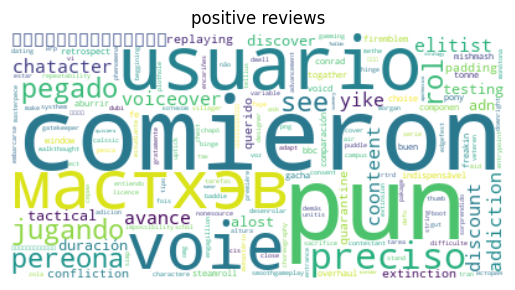

In [ ]:
text = {word: value for word, value in words}
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("positive reviews")
plt.show()

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

Topic: 0 
Words: 0.008*"character" + 0.007*"story" + 0.007*"turn" + 0.005*"gameplay" + 0.005*"route" + 0.005*"fan" + 0.005*"hour" + 0.005*"soundtrack" + 0.005*"time" + 0.004*"depth"
Topic: 1 
Words: 0.005*"review" + 0.004*"strategy" + 0.004*"switch" + 0.004*"story" + 0.004*"people" + 0.004*"gameplay" + 0.003*"ten" + 0.003*"user" + 0.003*"level" + 0.003*"beginning"
Topic: 2 
Words: 0.006*"story" + 0.006*"combat" + 0.006*"character" + 0.005*"hour" + 0.005*"strategy" + 0.005*"switch" + 0.004*"gameplay" + 0.004*"experience" + 0.004*"series" + 0.004*"system"
Topic: 3 
Words: 0.008*"story" + 0.008*"gameplay" + 0.007*"character" + 0.007*"persona" + 0.005*"style" + 0.005*"content" + 0.004*"hour" + 0.004*"year" + 0.004*"level" + 0.004*"strategy"
Topic: 4 
Words: 0.006*"mejor" + 0.004*"experience" + 0.004*"character" + 0.004*"time" + 0.004*"mark" + 0.004*"player" + 0.004*"battle" + 0.004*"level" + 0.004*"que" + 0.003*"dialogue"
Topic: 5 
Words: 0.008*"story" + 0.008*"character" + 0.005*"half" + 

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,dict,mds='mmds')
pyLDAvis.save_html(vis, 'results/all_positive.html')
vis

c:\Users\Jade Rosales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.035880  0.054056       1        1  11.721303
6      0.043141 -0.046628       2        1  10.400962
3     -0.018431  0.014540       3        1   7.077133
0     -0.008298  0.058785       4        1   6.831799
15     0.044789 -0.025156       5        1   6.187728
16     0.051140 -0.010781       6        1   5.707213
24     0.013762  0.047940       7        1   4.443993
10    -0.039925 -0.042070       8        1   3.998582
5     -0.045964  0.015648       9        1   3.918862
11     0.027946  0.025611      10        1   3.731885
13     0.055759  0.021370      11        1   3.565639
19    -0.007553  0.036214      12        1   3.397149
20    -0.056567  0.001147      13        1   3.158202
7     -0.043095  0.053156      14        1   2.784500
17     0.002188 -0.049570      15        1   2.580430
22    -0.037488  0.029280      16        1   2.435056
14    -0.003762 -0.018534      17        1   2.338559
12    -0.051742 -0.019509      18        1   2.318753
9      0.017366 -0.009545      19        1   2.257029
8      0.041199  0.003465      20        1   2.225637
21    -0.009223 -0.029196      21        1   2.101546
1      0.017009 -0.046544      22        1   1.844427
2      0.018415  0.011966      23        1   1.755848
4     -0.017751 -0.057767      24        1   1.612659
23    -0.028795 -0.017880      25        1   1.605108, topic_info=       Term        Freq       Total Category  logprob  loglift
9      time  134.000000  134.000000  Default  30.0000  30.0000
50   series  150.000000  150.000000  Default  29.0000  29.0000
103  review   69.000000   69.000000  Default  28.0000  28.0000
99     hour  120.000000  120.000000  Default  27.0000  27.0000
464   mejor   29.000000   29.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
2       bit    1.252423   71.592856  Topic25  -5.9604   0.0861
115     dlc    1.147668   44.259895  Topic25  -6.0478   0.4796
96      fan    1.278084   94.990911  Topic25  -5.9401  -0.1764
34     mode    1.138499   60.384589  Topic25  -6.0558   0.1610
611  school    1.071059   33.033204  Topic25  -6.1169   0.7031

[1595 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
412       1  0.102535   aaa
412       2  0.102535   aaa
412       7  0.102535   aaa
412       8  0.205070   aaa
412      10  0.102535   aaa
...     ...       ...   ...
1406      2  0.147129  무엇보다
1406     14  0.147129  무엇보다
1407      1  0.147129   지문과
1407      2  0.147129   지문과
1407     14  0.147129   지문과

[5895 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 7, 4, 1, 16, 17, 25, 11, 6, 12, 14, 20, 21, 8, 18, 23, 15, 13, 10, 9, 22, 2, 3, 5, 24])